# Instrumental Variables

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from src.utils import *

In [4]:
n = 1000

df = pd.DataFrame({
    "budget": np.random.exponential(10, n),
    "mail": np.random.binomial(1, 0.5, n),
})
df["subscribe"] = 1 * ((np.log(df.budget) + df.mail) > 3)
df["spend"] = np.maximum(np.random.normal(-3 + np.sqrt(df.budget) + df.subscribe, 3), 0)
df["buy"] = 1 * (df.spend > 0)

In [5]:
df.head()

,budget,mail,subscribe,spend,buy
0,4.016099,0,0,0.000000,0
1,4.090702,1,0,0.000000,0
2,0.159882,1,0,0.000000,0
3,9.696967,0,0,0.000000,0
4,17.104606,1,1,1.926142,1


In [6]:
df.mean()

budget       9.691961
mail         0.514000
subscribe    0.306000
spend        1.463683
buy          0.493000
dtype: float64

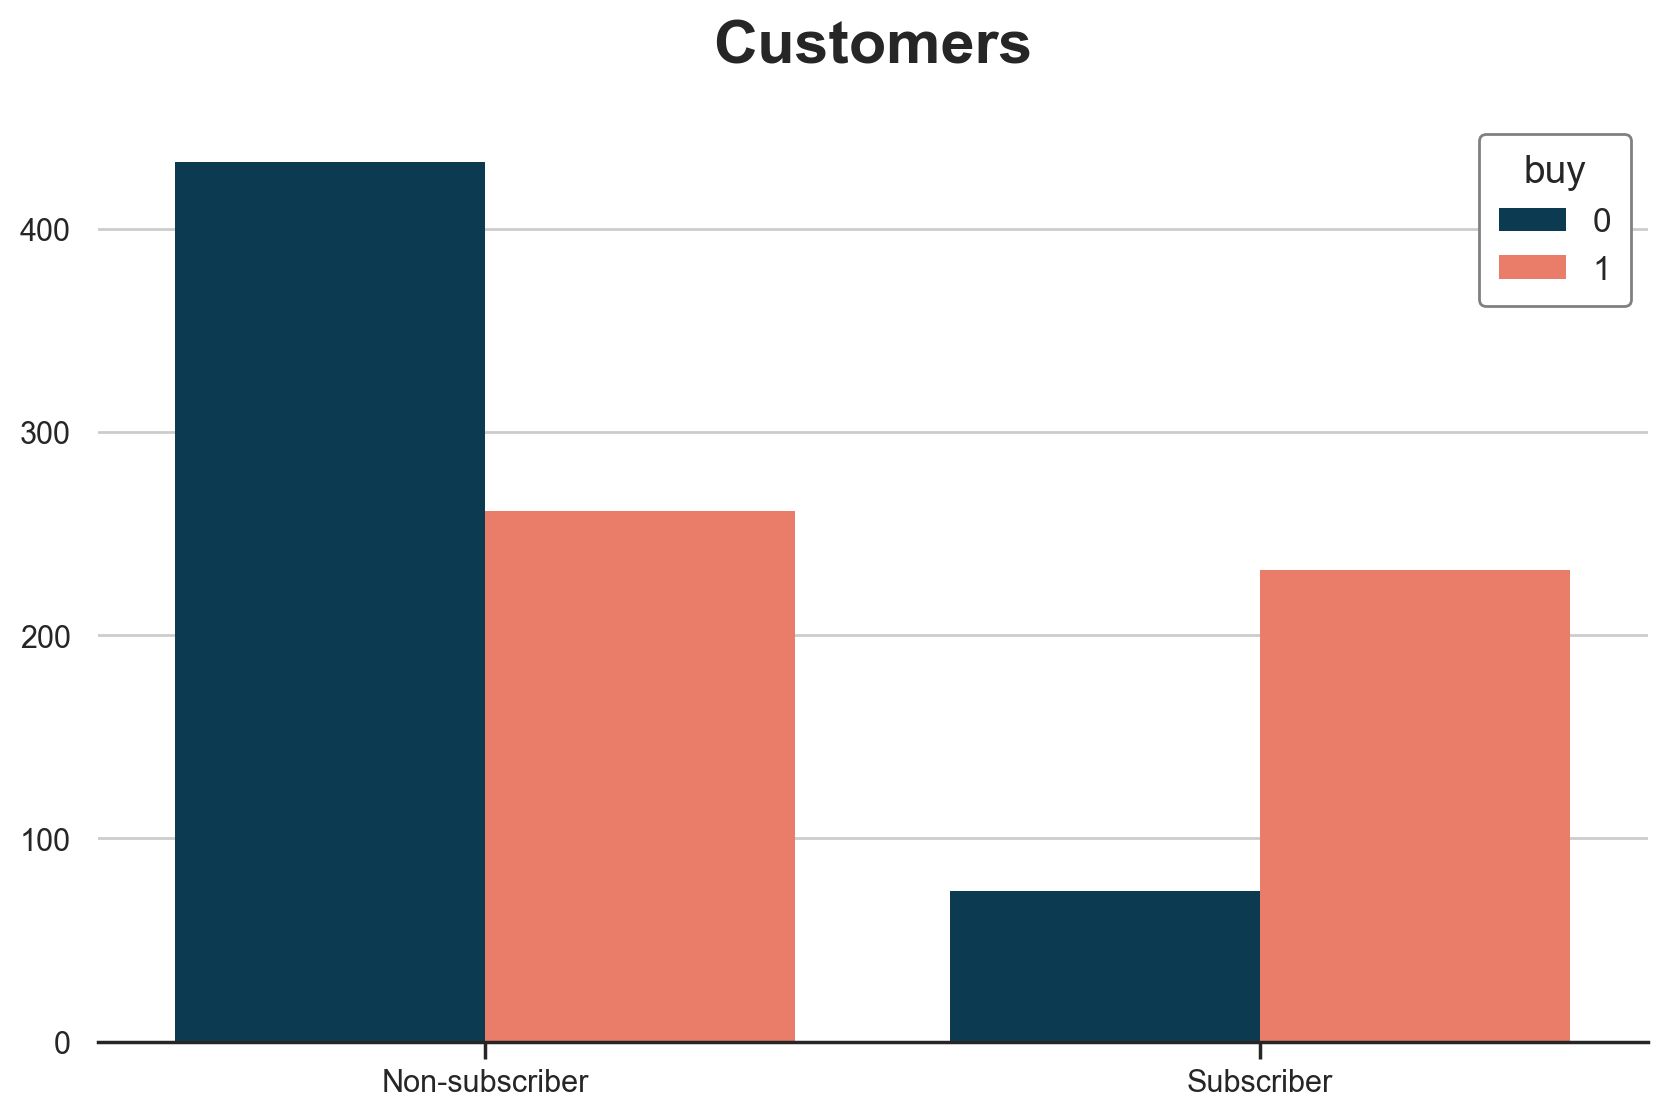

In [13]:
df["subscribe_str"] = np.where(df.subscribe, "Subscriber", "Non-subscriber")
g = sns.countplot(data=df, x="subscribe_str", hue="buy");
g.set(ylabel="", xlabel="", title="Customers");

Subscribers seem to be much more likely to spend money on our platform. But is it really the case?

We can imagine that customers that are most interested in the program are also the first to subscribe to the newsletter. 

We can represent the relationship between the variables in the following Dyrected Acyclic Graph (DAG).

```mermaid
flowchart LR
classDef included fill:#DCDCDC,stroke:#000000,stroke-width:2px;
classDef excluded fill:#ffffff,stroke:#000000,stroke-width:2px;

U((interest))
X((subscribe))
Y((buy))

U --> X
U --> Y
X --> Y

class X,Y included;
class U excluded;
```

In [8]:
print(smf.ols("buy ~ subscribe", data=df).fit().summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3761      0.018     21.152      0.000       0.341       0.411
subscribe      0.3821      0.032     11.888      0.000       0.319       0.445


With the encouragement, we can 

```mermaid
flowchart LR
classDef included fill:#DCDCDC,stroke:#000000,stroke-width:2px;
classDef excluded fill:#ffffff,stroke:#000000,stroke-width:2px;

U((interest))
Z((mail))
X((subscribe))
Y((buy))

U --> X
U --> Y
Z --> X
X --> Y

class Z,X,Y included;
class U excluded;
```